# Ingest Data

In [6]:
import quandl
import numpy as np
import pandas as pd

df = quandl.get("WIKI/AAPL", start_date="1979-12-31", end_date="2016-12-31")

df


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.870,28.7500,28.7500,2093900.0,0.0,1.0,0.427992,0.429779,0.427992,0.427992,117258400.0
1980-12-15,27.38,27.380,27.2500,27.2500,785200.0,0.0,1.0,0.407597,0.407597,0.405662,0.405662,43971200.0
1980-12-16,25.37,25.370,25.2500,25.2500,472000.0,0.0,1.0,0.377675,0.377675,0.375889,0.375889,26432000.0
1980-12-17,25.87,26.000,25.8700,25.8700,385900.0,0.0,1.0,0.385119,0.387054,0.385119,0.385119,21610400.0
1980-12-18,26.63,26.750,26.6300,26.6300,327900.0,0.0,1.0,0.396432,0.398219,0.396432,0.396432,18362400.0
1980-12-19,28.25,28.380,28.2500,28.2500,217100.0,0.0,1.0,0.420549,0.422484,0.420549,0.420549,12157600.0
1980-12-22,29.63,29.750,29.6300,29.6300,166800.0,0.0,1.0,0.441093,0.442879,0.441093,0.441093,9340800.0
1980-12-23,30.88,31.000,30.8800,30.8800,209600.0,0.0,1.0,0.459701,0.461487,0.459701,0.459701,11737600.0
1980-12-24,32.50,32.630,32.5000,32.5000,214300.0,0.0,1.0,0.483817,0.485753,0.483817,0.483817,12000800.0


# Profile Data

In [43]:
columns = df.columns.values

for column in columns:
        if column != "Date":
                print (column, df[column].max(), df[column].min(), df[column].mean())

Open 702.41 11.12 99.3892337891486
High 705.07 11.12 100.62762338994247
Low 699.57 11.0 98.04176346493169
Close 702.1 11.0 99.34610370533736
Volume 189560600.0 4471.0 11372202.490626378
Ex-Dividend 3.29 0.0 0.0035013233348037054
Split Ratio 7.0 1.0 1.000992501102779
Adj. Open 129.837026407 0.165539957185 17.040781480340737
Adj. High 129.919107008 0.165539957185 17.214145415241273
Adj. Low 127.413707108 0.163753554769 16.849180369892025
Adj. Close 128.519122831 0.163753554769 17.034528418197198
Adj. Volume 1855410200.0 250376.0 90793242.1801941


# K Nearest Neighbour(KNN)

In [39]:
%matplotlib inline 

import matplotlib.pyplot as plt
df.index = pd.to_datetime(df.index, format="%Y-%m-%d")
X = (df.index - df.index[0]).days.reshape(-1,1)
y = df["Close"].values

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

knn = KNeighborsRegressor()
lr = KernelRidge()

lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
print ("KNN Score = ", knn.score(X_test, y_test))
print ("Kernel Ridge = ", lr.score(X_test, y_test))

KNN Score =  0.998671933245
Kernel Ridge =  0.336327250214


# Simple Linear Regression

Slope              :  [ 0.02111903]
Intercept          :  -40.2290233355
Mean squared error :  12560.8623581
Variance score     :  0.361132565553


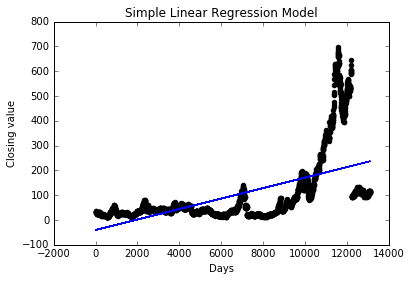

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

lm = LinearRegression()
lm.fit(X_train , y_train)
mse1 = mean_squared_error(lm.predict(X_test),y_test)
mse1_train = mean_squared_error(lm.predict(X_train),y_train)
Score_test = lm.score(X_test, y_test)

print ("Slope              : ",lm.coef_) 
print ("Intercept          : ",lm.intercept_)
print ("Mean squared error : ", mse1)
print ("Variance score     : ",Score_test)
plt.scatter(X_test, y_test,color='black')
plt.plot(X_test,lm.predict(X_test),color='blue')
plt.title('Simple Linear Regression Model')
plt.xlabel('Days')
plt.ylabel('Closing value')
plt.show()

# Linear Regression Lasso

Slope              :  [ 0.02205229]
Intercept          :  -44.3869919129
Mean squared error :  11718.1079356
Variance score     :  0.340548143845


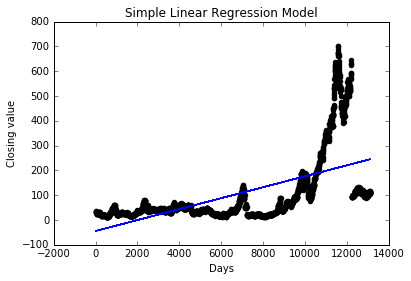

In [33]:
from sklearn import linear_model as lm
regr = lm.Lasso()
scores = [regr.fit(X_train, y_train
            ).score(X_test, y_test)]

regr.fit(X_train, y_train)
mse1 = mean_squared_error(regr.predict(X_test),y_test)
mse1_train = mean_squared_error(regr.predict(X_train),y_train)
print ("Slope              : ",regr.coef_) 
print ("Intercept          : ",regr.intercept_)
print ("Mean squared error : ", mse1)
print ("Variance score     : ",Score_test)
plt.scatter(X_test, y_test,color='black')
plt.plot(X_test,regr.predict(X_test),color='blue')
plt.title('Simple Linear Regression Model')
plt.xlabel('Days')
plt.ylabel('Closing value')
plt.show()

# Support Vector Machine

In [38]:
from sklearn import svm
clf = svm.SVR()
clf.fit(X_train, y_train) 
clf.predict(X_test)
Score = clf.score(X_test,y_test)
print("Score:", Score)


Score: -0.173288941931
